In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
from DLCPro import *

In [2]:
def set_fontsize(ax, fs, legend = False):
    """
    Small function to set font sizes for figures
    """
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.yaxis.offsetText.set_fontsize(fs)
    if legend:
        [t.set_fontsize(fs) for t in ax.legend().get_texts()]
    ax.title.set_size(int(fs*1.2))

### Can't run DLC Pro in notebook due to issues with asynch in notebook and DLC Pro driver

In [3]:
# dlc = DLCPro(0, '172.28.168.181')

In [4]:
with open('data_locked.dat', 'rb') as rfp:
    data_locked = pickle.load(rfp)
    
with open('data_unlocked.dat', 'rb') as rfp:
    data_unlocked = pickle.load(rfp)

In [5]:
def plot_data(data_l, data_u, ts, idx):
    dl = data_l[ts][idx]
    du = data_u[ts][idx]
    fig, ax = plt.subplots(figsize = (12,8))
    ax.plot(dl['x'], dl['y'])
    ax.plot(du['x'], du['y'])
    ax.set_xlabel('time [ms]')
    ax.set_ylabel('[V]')
    set_fontsize(ax, 15)

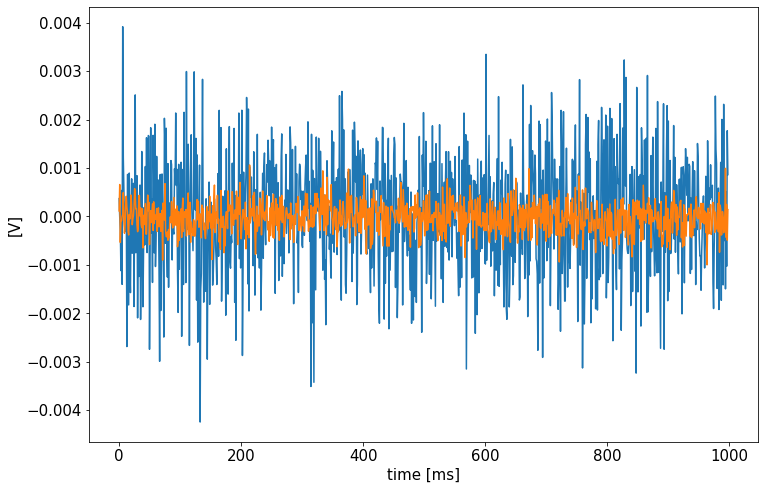

In [6]:
plot_data(data_locked, data_unlocked, 1000, 8)

In [7]:
def plot_fft(data_l, data_u, ts, idx):
    dl = data_locked[ts][idx]
    du = data_unlocked[ts][idx]
    ampl = np.abs(np.fft.rfft(dl['y']))
    ampu = np.abs(np.fft.rfft(du['y']))
    freqsl = np.fft.rfftfreq(len(dl['x']), np.diff(dl['x'])[0]*1e-3)
    freqsu = np.fft.rfftfreq(len(du['x']), np.diff(du['x'])[0]*1e-3)
    
    fig, ax = plt.subplots(figsize = (12,8))
    ax.plot(freqsl, ampl)
    ax.plot(freqsu, ampu)
    ax.set_xlabel('frequency [Hz]')
    set_fontsize(ax, 15)

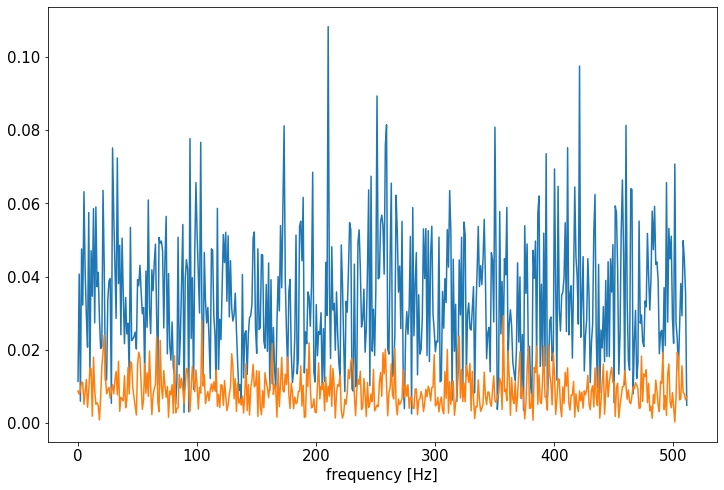

In [8]:
plot_fft(data_locked, data_unlocked, 1000, 0)

In [202]:
data_l = []
for val in data_locked.values():
    for v in val.values():
        data_l.append(np.array(v['y']))
        
data_u = []
for val in data_unlocked.values():
    for v in val.values():
        data_u.append(np.array(v['y']))
data_l = np.array(data_l)
data_u = np.array(data_u)

data_l = np.array([[ma, mi] for ma, mi in zip(np.max(data_l, axis = 1), np.min(data_l, axis = 1))])
data_u = np.array([[ma, mi] for ma, mi in zip(np.max(data_u, axis = 1), np.min(data_u, axis = 1))])

In [203]:
rnd_locked = np.random.choice(range(len(data_l)), 15)
rnd_unlocked = np.random.choice(range(len(data_u)), 15)

In [204]:
from sklearn.neural_network import MLPClassifier

In [206]:
data = list(data_l[rnd_locked])+list(data_u[rnd_unlocked])
target = [1]*15 +[0]*15

In [207]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1, max_iter = 1000)

In [208]:
%%time
clf.fit(data, target)

Wall time: 9.01 ms


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [209]:
correct_locked = clf.predict(data_l).sum()/len(data_l)
correct_unlocked = 1 - clf.predict(data_u).sum()/len(data_u)
print(f'prediction accuracy => locked : {correct_locked}; unlocked : {correct_unlocked}')

prediction accuracy => locked : 1.0; unlocked : 0.0


In [210]:
for idx, d in enumerate(data_u):
    result = clf.predict([d])
    if result != 0:
        print(f'{idx} : wrong result')

0 : wrong result
1 : wrong result
2 : wrong result
3 : wrong result
4 : wrong result
5 : wrong result
6 : wrong result
7 : wrong result
8 : wrong result
9 : wrong result
10 : wrong result
11 : wrong result
12 : wrong result
13 : wrong result
14 : wrong result
15 : wrong result
16 : wrong result
17 : wrong result
18 : wrong result
19 : wrong result
20 : wrong result
21 : wrong result
22 : wrong result
23 : wrong result
24 : wrong result
25 : wrong result
26 : wrong result
27 : wrong result
28 : wrong result
29 : wrong result
30 : wrong result
31 : wrong result
32 : wrong result
33 : wrong result
34 : wrong result
35 : wrong result
36 : wrong result
37 : wrong result
38 : wrong result
39 : wrong result


In [211]:
for idx, d in enumerate(data_l):
    result = clf.predict([d])
    if result != 1:
        print(f'{idx} : wrong result')

In [132]:
%%timeit
np.max(data_l, axis = 1)

17 µs ± 427 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [133]:
%%timeit
np.std(data_l, axis = 1)

131 µs ± 2.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [134]:
%%timeit
np.ptp(data_l, axis = 1)

30.8 µs ± 575 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


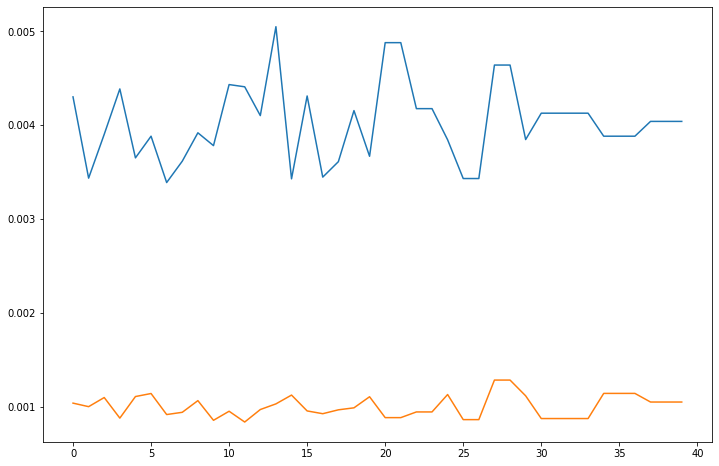

In [213]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.max(data_l, axis = 1))
ax.plot(np.max(data_u, axis = 1))

In [216]:
np.max(data_l, axis = 1).min()

0.003387952